<a href="https://colab.research.google.com/github/harshithgowdakc/own_projects/blob/main/Loan_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/archive.zip")

In [ ]:
df.shape

(614, 13)

In [ ]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)

In [ ]:
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace = True)

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

In [ ]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [ ]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

In [ ]:
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)

In [ ]:
df['Self_Employed'].nunique()

2

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# create dummy variables for all categorical columns except one
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Loan_Status              614 non-null    object 
 7   Gender_Male              614 non-null    uint8  
 8   Married_Yes              614 non-null    uint8  
 9   Dependents_1             614 non-null    uint8  
 10  Dependents_2             614 non-null    uint8  
 11  Dependents_3+            614 non-null    uint8  
 12  Education_Not Graduate   614 non-null    uint8  
 13  Self_Employed_Yes        614 non-null    uint8  
 14  Property_Area_Semiurban  6

In [ ]:
corr = df.corr()

<Axes: >

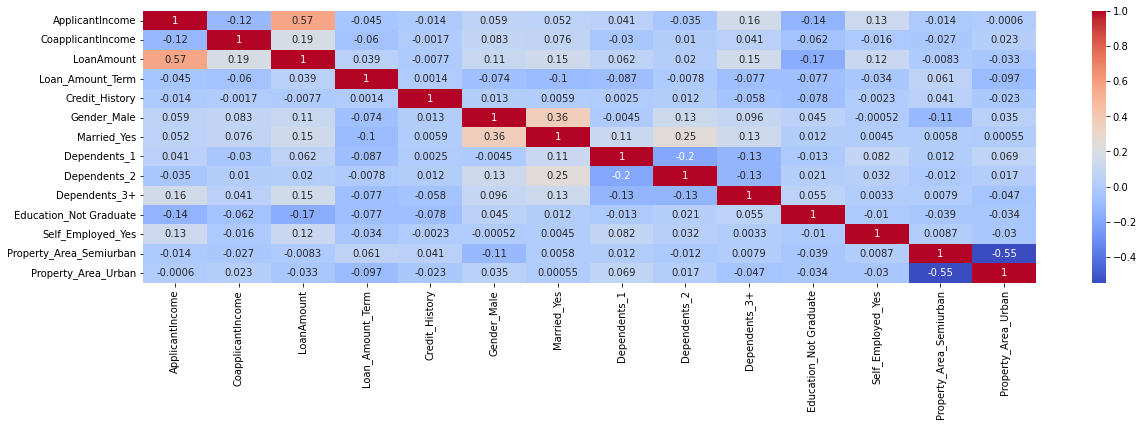

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.head(2)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,146.412162,360.0,1.0,Y,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,N,1,1,1,0,0,0,0,0,0


In [ ]:
df.shape

(614, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Loan_Status              614 non-null    object 
 7   Gender_Male              614 non-null    uint8  
 8   Married_Yes              614 non-null    uint8  
 9   Dependents_1             614 non-null    uint8  
 10  Dependents_2             614 non-null    uint8  
 11  Dependents_3+            614 non-null    uint8  
 12  Education_Not Graduate   614 non-null    uint8  
 13  Self_Employed_Yes        614 non-null    uint8  
 14  Property_Area_Semiurban  6

In [ ]:
X = df.iloc[:, 1:16].values
y = df['Loan_Status'].values

In [ ]:
X = np.delete(X, 5, axis=1)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [ ]:
X

array([[5849, 0.0, 146.41216216216216, ..., 0, 0, 1],
       [4583, 1508.0, 128.0, ..., 0, 0, 0],
       [3000, 0.0, 66.0, ..., 1, 0, 1],
       ...,
       [8072, 240.0, 253.0, ..., 0, 0, 1],
       [7583, 0.0, 187.0, ..., 0, 0, 1],
       [4583, 0.0, 133.0, ..., 1, 1, 0]], dtype=object)

In [ ]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [ ]:
X.shape

(614, 14)

In [ ]:
y.shape

(614,)

In [ ]:
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Logestic

In [ ]:
Model =LogisticRegression()

In [ ]:
Model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_predict = Model.predict(X_train)
training_data_accuracy = accuracy_score(X_predict, y_train)

In [ ]:
training_data_accuracy

0.8187372708757638

In [ ]:
y_predict = Model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.80


In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
X_testpred = model.predict(X_train)
training_accuracy = accuracy_score(X_testpred, y_train)
training_accuracy

1.0

In [ ]:
y_testpred = model.predict(X_test)
test_accuracy = accuracy_score(y_testpred, y_test)
test_accuracy

0.7560975609756098

In [ ]:
rf = RandomForestClassifier()

In [ ]:
# Define the hyperparameter grid to search over
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [ ]:
# Train the random forest classifier on the training set using the best hyperparameters
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=10)

In [ ]:
# Evaluate the performance of the classifier on the test set
test_accuracy = np.mean(best_rf.predict(X_test) == y_test)
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.7967479674796748


In [ ]:
y_train = np.array([0 if label == 'N' else 1 for label in y_train])
y_test = np.array([0 if label == 'N' else 1 for label in y_test])

In [ ]:
# Create an XGBoost classifier object
xgb_model = xgb.XGBClassifier()

# Define the hyperparameter grid to search over
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 1],
              'n_estimators': [10, 50, 100],
              'gamma': [0, 0.1, 1]}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Train the XGBoost classifier on the training set using the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**grid_search.best_params_)
best_xgb_model.fit(X_train, y_train)

# Evaluate the performance of the classifier on the test set
test_accuracy = np.mean(best_xgb_model.predict(X_test) == y_test)
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.7886178861788617


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the SVM classifier with an RBF kernel
svm_model = svm.SVC(kernel='rbf')

# Define a dictionary of hyperparameters to search over
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Train the SVM classifier on the training set using the best hyperparameters
best_svm = svm.SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
best_svm.fit(X_train, y_train)

# Make predictions on the test set
svm_preds = best_svm.predict(X_test)

# Evaluate the accuracy of the classifier
svm_acc = accuracy_score(y_test, svm_preds)
print("SVM accuracy:", svm_acc)

SVM accuracy: 0.6747967479674797


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
logreg_model = LogisticRegression()

# Define a dictionary of hyperparameters to search over
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Train the logistic regression model on the training set using the best hyperparameters
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'])
best_logreg.fit(X_train, y_train)

# Make predictions on the test set
logreg_preds = best_logreg.predict(X_test)

# Evaluate the accuracy of the classifier
logreg_acc = accuracy_score(y_test, logreg_preds)
print("Logistic regression accuracy:", logreg_acc)

Logistic regression accuracy: 0.7967479674796748


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'penalty': ['l1', 'l2']}

# Create a logistic regression model
lr_model = LogisticRegression()

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Train the logistic regression model on the training set using the best hyperparameters
best_lr_model = LogisticRegression(C=grid_search.best_params_['C'], 
                                    penalty=grid_search.best_params_['penalty'])
best_lr_model.fit(X_train, y_train)

# Evaluate the logistic regression model on the test set
lr_accuracy = best_lr_model.score(X_test, y_test)
print('Logistic regression accuracy:', lr_accuracy)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Logistic regression accuracy: 0.7886178861788617


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback